# Gaussian Mixture from scratch avec Python

## Importation des packages

In [ ]:
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

from matplotlib.colors import LogNorm

## Création du jeu de données

In [ ]:
np.random.seed(123)

mu, sigma = 2, 5 # mean and standard deviation
x_train_1_1 = np.random.normal(mu, sigma, 100)
mu, sigma = 5, 1 # mean and standard deviation
x_train_1_2 = np.random.normal(mu, sigma, 100)

mu, sigma = 5, 3 # mean and standard deviation
x_train_2_1 = np.random.normal(mu, sigma, 100)
mu, sigma = 20, 1 # mean and standard deviation
x_train_2_2 = np.random.normal(mu, sigma, 100)

mu, sigma = 22, 2.5 # mean and standard deviation
x_train_3_1 = np.random.normal(mu, sigma, 100)
mu, sigma = 10, 8 # mean and standard deviation
x_train_3_2 = np.random.normal(mu, sigma, 100)

x_train = np.stack([np.concatenate([x_train_1_1, x_train_2_1, x_train_3_1]),
                    np.concatenate([x_train_1_2, x_train_2_2, x_train_3_2])], axis=1)

np.random.shuffle(x_train)

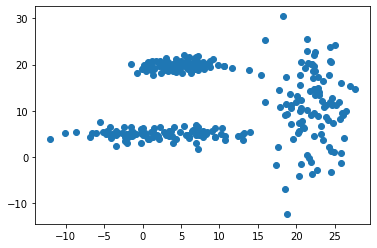

In [ ]:
plt.scatter(x_train[:, 0], x_train[:, 1])
plt.show()

## Implémentation du K-means

### Initialisation de la classe

In [ ]:
class GaussianMixture:

  def __init__(self, k: int, max_iter: int = 100) -> None :
    ''' Initialization function '''
    self.k = k
    self.cov = None
    self.mean = None
    self.pi = None

In [ ]:
gm = GaussianMixture(2)

print(gm.k)
print(gm.cov)
print(gm.mean)
print(gm.pi)

2
None
None
None


## Initialisation des lois

In [ ]:
class GaussianMixture:

  def __init__(self, k: int, max_iter: int = 100) -> None :
    ''' Initialization function '''
    self.k = k
    self.cov = None
    self.mean = None
    self.pi = None

  def law_update(self, x_split: np.ndarray) -> None:
    ''' Compute random covarience and mean for k law '''

    # Initial computation of the mean and covarience matrix
    self.mean = np.array([np.mean(x, axis=0) for x in x_split])
    self.cov = np.array([np.cov(x.T) for x in x_split])

    split_shape = np.array([x_shape.shape[0] for x_shape in x_split])

    self.pi = split_shape/np.sum(split_shape)

In [ ]:
gm = GaussianMixture(3)

new_X = np.array_split(x_train, gm.k)

gm.law_update(new_X)

print(gm.k)
print(gm.cov.shape)
print(gm.mean.shape)

3
(3, 2, 2)
(3, 2)


### La loi normal

$$
N(x ; \mu , \Sigma) = \frac{1}{(2 \pi)^{d/2} }\Sigma^{-1/2} e ^{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x- \mu)}
$$

où :

$\mu$ est la moyenne.

$$ \hat{\mu}=\frac{1}{m} \sum_i{x^{(i)}}$$

$\Sigma$ est la matrice de covariance.

$$ \hat{\Sigma}=\frac{1}{m}\sum_i{(x^{(i)}-\hat{\mu})^T(x^{(i)}-\hat{\mu})}$$






In [ ]:
class GaussianMixture:

  def __init__(self, k: int, max_iter: int = 100) -> None :
    ''' Initialization function '''
    self.k = k
    self.cov = None
    self.mean = None
    self.pi = None

  def law_update(self, x_split: np.ndarray) -> None:
    ''' Compute random covarience and mean for k law '''

    # Initial computation of the mean and covarience matrix
    self.mean = np.array([np.mean(x, axis=0) for x in x_split])
    self.cov = np.array([np.cov(x.T) for x in x_split])

    split_shape = np.array([x_shape.shape[0] for x_shape in x_split])

    self.pi = split_shape/np.sum(split_shape)

  @staticmethod
  def normal_law(x: float, mu: float, sigma: float) -> float:
    ''' Compute the euclidean distance between two vectors '''

    return (2*np.pi)**(-len(x)/2)*np.linalg.det(sigma)**(-1/2)*np.exp(-np.dot(np.dot((x-mu), np.linalg.inv(sigma)).T, (x-mu))/2)

In [ ]:
gm = GaussianMixture(3)

new_X = np.array_split(x_train, gm.k)

gm.law_update(new_X)

GaussianMixture.normal_law(x_train[0, :], gm.mean[0], gm.cov[0])

0.0013585183348581854

In [ ]:
from scipy.stats import multivariate_normal

multivariate_normal.pdf(x_train[0, :], mean=gm.mean[0], cov=gm.cov[0])

0.0013585183348581852

## Probabilité d'appartenance

In [ ]:
class GaussianMixture:

  def __init__(self, k: int, max_iter: int = 100) -> None :
    ''' Initialization function '''
    self.k = k
    self.cov = None
    self.mean = None
    self.pi = None

  def law_update(self, x_split: np.ndarray) -> None:
    ''' Compute random covarience and mean for k law '''

    # Initial computation of the mean and covarience matrix
    self.mean = np.array([np.mean(x, axis=0) for x in x_split])
    self.cov = np.array([np.cov(x.T) for x in x_split])

    split_shape = np.array([x_shape.shape[0] for x_shape in x_split])

    self.pi = split_shape/np.sum(split_shape)

  @staticmethod
  def normal_law(x: float, mu: float, sigma: float) -> float:
    ''' Compute the euclidean distance between two vectors '''

    return (2*np.pi)**(-len(x)/2)*np.linalg.det(sigma)**(-1/2)*np.exp(-np.dot(np.dot((x-mu), np.linalg.inv(sigma)).T, (x-mu))/2)

  @staticmethod
  def compute_law(x: np.ndarray, mu:float, sigma:float) -> np.ndarray:
    ''' Compute normal law for all the observations '''

    return np.array([GaussianMixture.normal_law(obs, mu, sigma) for obs in x ])

In [ ]:
gm = GaussianMixture(3)

new_X = np.array_split(x_train, gm.k)

gm.law_update(new_X)

compute = GaussianMixture.compute_law(x_train, gm.mean[0], gm.cov[0])

compute.shape

(300,)

## Predict

Calcul la probabilité d'appartenance pour la nème observation par rapport au cluster k

$$ r_{nk} = \frac{\pi_k N(x_n|\mu_k, \Sigma_k)}{\sum_j \pi_j N(x_n|\mu_j, \Sigma_j)}$$

Où:

- $k$ est le nombre de clusters,
- $n$ est l'observations,
- $\pi_k$ est l'importance de la loi dans le modèle

In [ ]:
class GaussianMixture:

  def __init__(self, k: int, max_iter: int = 100) -> None :
    ''' Initialization function '''
    self.k = k
    self.cov = None
    self.mean = None
    self.pi = None

  def law_update(self, x_split: np.ndarray) -> None:
    ''' Compute random covarience and mean for k law '''

    # Initial computation of the mean and covarience matrix
    self.mean = np.array([np.mean(x, axis=0) for x in x_split])
    self.cov = np.array([np.cov(x.T) for x in x_split])

    split_shape = np.array([x_shape.shape[0] for x_shape in x_split])

    self.pi = split_shape/np.sum(split_shape)

  @staticmethod
  def normal_law(x: float, mu: float, sigma: float) -> float:
    ''' Compute the euclidean distance between two vectors '''

    return (2*np.pi)**(-len(x)/2)*np.linalg.det(sigma)**(-1/2)*np.exp(-np.dot(np.dot((x-mu), np.linalg.inv(sigma)).T, (x-mu))/2)

  @staticmethod
  def compute_law(x: np.ndarray, mu:float, sigma:float) -> np.ndarray:
    ''' Compute normal law for all the observations '''

    return np.array([GaussianMixture.normal_law(obs, mu, sigma) for obs in x ])

  def predict(self, x: np.ndarray) -> np.ndarray:
    ''' Predict the probability of belonging to each class'''

    # Initialize the matrix to zeros
    r = np.zeros((x.shape[0], self.k))

    for k in range(self.k):
      r[:, k] = self.pi[k] * GaussianMixture.compute_law(x, self.mean[k], self.cov[k])
      r[:, k] /= np.sum([self.pi[j]*GaussianMixture.compute_law(x, self.mean[j], self.cov[j]) for j in range(self.k)])

    return r

In [ ]:
gm = GaussianMixture(3)

new_X = np.array_split(x_train, gm.k)

gm.law_update(new_X)

r = gm.predict(x_train)

print(r.shape)

(300, 3)


## Visualisation du modèle

In [ ]:
class GaussianMixture:

  def __init__(self, k: int, max_iter: int = 100) -> None :
    ''' Initialization function '''
    self.k = k
    self.cov = None
    self.mean = None
    self.pi = None

  def law_update(self, x_split: np.ndarray) -> None:
    ''' Compute random covarience and mean for k law '''

    # Initial computation of the mean and covarience matrix
    self.mean = np.array([np.mean(x, axis=0) for x in x_split])
    self.cov = np.array([np.cov(x.T) for x in x_split])

    split_shape = np.array([x_shape.shape[0] for x_shape in x_split])

    self.pi = split_shape/np.sum(split_shape)

  @staticmethod
  def normal_law(x: float, mu: float, sigma: float) -> float:
    ''' Compute the euclidean distance between two vectors '''

    return (2*np.pi)**(-len(x)/2)*np.linalg.det(sigma)**(-1/2)*np.exp(-np.dot(np.dot((x-mu), np.linalg.inv(sigma)).T, (x-mu))/2)

  @staticmethod
  def compute_law(x: np.ndarray, mu:float, sigma:float) -> np.ndarray:
    ''' Compute normal law for all the observations '''

    return np.array([GaussianMixture.normal_law(obs, mu, sigma) for obs in x ])

  def predict(self, x: np.ndarray) -> np.ndarray:
    ''' Predict the probability of belonging to each class'''

    # Initialize the matrix to zeros
    r = np.zeros((x.shape[0], self.k))

    for k in range(self.k):
      r[:, k] = self.pi[k] * GaussianMixture.compute_law(x, self.mean[k], self.cov[k])
      r[:, k] /= np.sum([self.pi[j]*GaussianMixture.compute_law(x, self.mean[j], self.cov[j]) for j in range(self.k)])

    return r

  def plot_model(self, x_train: np.ndarray) -> None:
    ''' Plots a visualization of the model on the training dataset '''

    plt.scatter(x_train[:, 0], x_train[:, 1])

    x = np.linspace(np.min(x_train[:, 0]-5), np.max(x_train[:, 0]+5))
    y = np.linspace(np.min(x_train[:, 1]-5), np.max(x_train[:, 1]+5))
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T

    Z = -np.log(self.predict(XX))

    for k in range(self.k) :
      Z_1 = Z[:, k]
      Z_1 = Z_1.reshape(X.shape)

      CS = plt.contour(
          X, Y, Z_1, norm=LogNorm(vmin=1.0, vmax=10.0), levels=np.logspace(0, 1, 20)
      )

    plt.show()

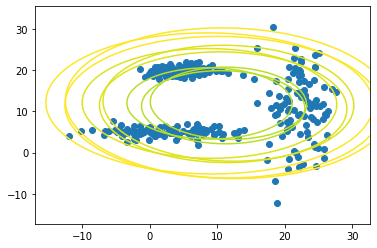

In [ ]:
gm = GaussianMixture(3)

np.random.seed(123456789)

shuffle_x = [x_train[np.random.choice(np.arange(0, x_train.shape[0]),
                          size=int(x_train.shape[0]*0.3))] for i in range(gm.k)]

gm.law_update(shuffle_x)

gm.plot_model(x_train)

## Entraînement du modèle

In [ ]:
class GaussianMixture:

  def __init__(self, k: int, max_iter: int = 100) -> None :
    ''' Initialization function '''
    self.k = k
    self.cov = None
    self.mean = None
    self.pi = None

  def law_update(self, x_split: np.ndarray) -> None:
    ''' Compute random covarience and mean for k law '''

    # Initial computation of the mean and covarience matrix
    self.mean = np.array([np.mean(x, axis=0) for x in x_split])
    self.cov = np.array([np.cov(x.T) for x in x_split])

    split_shape = np.array([x_shape.shape[0] for x_shape in x_split])

    self.pi = split_shape/np.sum(split_shape)

  @staticmethod
  def normal_law(x: float, mu: float, sigma: float) -> float:
    ''' Compute the euclidean distance between two vectors '''

    return (2*np.pi)**(-len(x)/2)*np.linalg.det(sigma)**(-1/2)*np.exp(-np.dot(np.dot((x-mu), np.linalg.inv(sigma)).T, (x-mu))/2)

  @staticmethod
  def compute_law(x: np.ndarray, mu:float, sigma:float) -> np.ndarray:
    ''' Compute normal law for all the observations '''

    return np.array([GaussianMixture.normal_law(obs, mu, sigma) for obs in x ])

  def predict(self, x: np.ndarray) -> np.ndarray:
    ''' Predict the probability of belonging to each class'''

    # Initialize the matrix to zeros
    r = np.zeros((x.shape[0], self.k))

    for k in range(self.k):
      r[:, k] = self.pi[k] * GaussianMixture.compute_law(x, self.mean[k], self.cov[k])
      r[:, k] /= np.sum([self.pi[j]*GaussianMixture.compute_law(x, self.mean[j], self.cov[j]) for j in range(self.k)])

    return r

  def plot_model(self, x_train: np.ndarray) -> None:
    ''' Plots a visualization of the model on the training dataset '''

    plt.scatter(x_train[:, 0], x_train[:, 1])

    x = np.linspace(np.min(x_train[:, 0]-5), np.max(x_train[:, 0]+5))
    y = np.linspace(np.min(x_train[:, 1]-5), np.max(x_train[:, 1]+5))
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T

    Z = -np.log(self.predict(XX))

    for k in range(self.k) :
      Z_1 = Z[:, k]
      Z_1 = Z_1.reshape(X.shape)

      CS = plt.contour(
          X, Y, Z_1, norm=LogNorm(vmin=1.0, vmax=10.0), levels=np.logspace(0, 1, 20)
      )

    plt.show()

  def fit(self, x: np.ndarray) -> None:
   ''' Train model to split the dataframe x into the best k cluster '''

    # Take k subsamples of the original distribution
    shuffle_x = [x[np.random.choice(np.arange(0, x.shape[0]),
                              size=int(x.shape[0]*0.3))] for i in range(self.k)]

    # Initilize the model with random observations
    self.law_update(shuffle_x)

    # Initialize last_mean and last_cov
    last_mean = np.zeros(self.mean.shape)
    last_cov = np.zeros(self.cov.shape)

    # When the model do not update the laws, stop the training
    while not(np.array_equal(last_cov, self.cov)) and not(np.array_equal(last_mean, self.mean)):

      # Visualize the model
      self.plot_model(x)

      # Save the last laws
      last_mean = self.mean
      last_cov = self.cov

      # Predict the training sample
      r = gm.predict(x)

      # Transform the probability matrix into hard prediction
      pred_law = [x[np.argmax(r, axis=1)==i] for i in range(self.k)]

      # Update the laws
      self.law_update(pred_law)



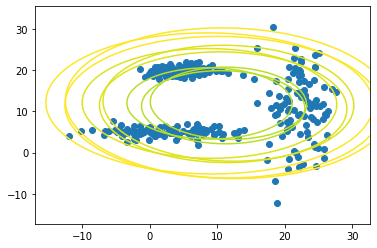

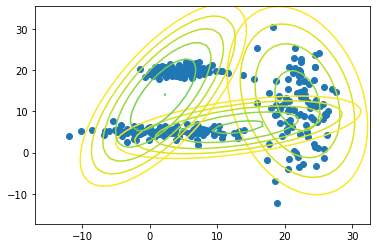

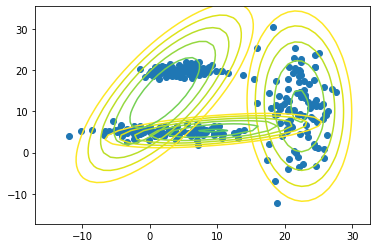

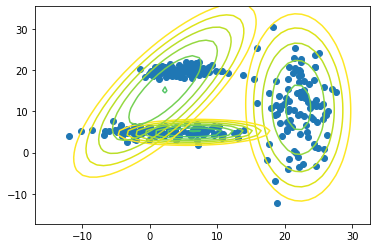

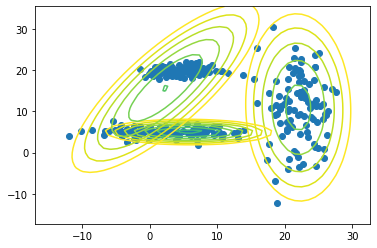

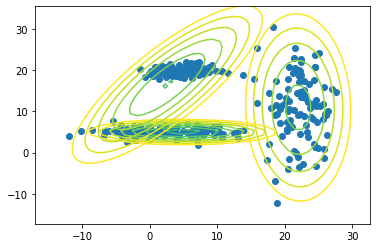

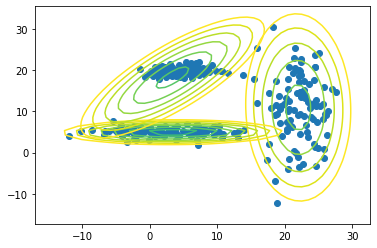

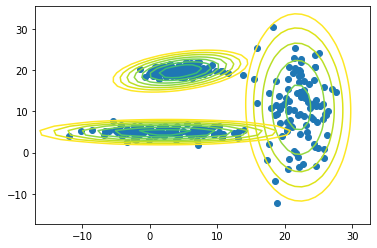

<ipython-input-17-39bd10b058e7>:50: RuntimeWarning: divide by zero encountered in log
  Z = -np.log(self.predict(XX))


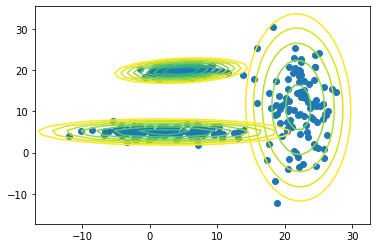

In [ ]:
np.random.seed(123456789)
gm = GaussianMixture(3)

gm.fit(x_train)